Assume that you have the logistic regression model

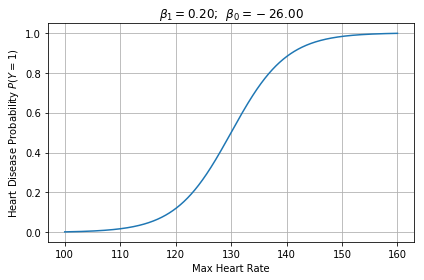

In [5]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

def logR(x, b1, b0):
    return 1/(1+np.exp(-(x*b1+b0)))


def plot_logR(x, b1, b0, print_betas=False):
    output = logR(input,b1,b0)
    #plt.xkcd(scale=0.6, length=0.0)
    plt.plot(input, output)
    if print_betas:
        plt.title(r'$\beta_1=%.2f$;  $\beta_0=%.2f$' % (b1, b0))
    else:
        plt.title(r'$\beta_1=?$;  $\beta_0=?$')
    plt.ylabel(r'Heart Disease Probability $P(Y=1)$')
    plt.xlabel('Max Heart Rate')
    plt.tight_layout()
    plt.grid()
    plt.show()

input= np.linspace(100,160,1000)
b1 = 0.2
output = plot_logR(input,b1,-130*b1, True)

Which estimates the probability of having a Hear Disease, given the MAX Heart Rate of a subject.

Create a function that given a $Max Heart Rate$ value, generate $N$ patientes that are either healthy (0) or have a Heart Disease (1). To do so, you should sample from a bernoulli distribution and extract the parameter that defines that bernoulli distribution from the Logistic Regresion output.

In [14]:
def bernoulli_sampler(MaxHeartRate, N_patients, b1, b0):
    p_bernoulli = output = logR(MaxHeartRate, b1, b0)
    probabilities = np.random.uniform(size=N_patients)
    bernoulli_samples = 1*(probabilities<p_bernoulli)
    return bernoulli_samples

For $Max Heart Rate={100, 120, 130, 150}$ generate a population of 100 patients, for every $Max Heart Rate$

In [23]:
n_patients = 100
print(bernoulli_sampler(100,n_patients,b1,-130*b1))
print(bernoulli_sampler(120,n_patients,b1,-130*b1))
print(bernoulli_sampler(130,n_patients,b1,-130*b1))
print(bernoulli_sampler(150,n_patients,b1,-130*b1))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 0 0 0
 1 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1
 1 1 1 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


For every population that you previously generated calulate it's probability of choosing a patient with a Heart Disease

In [25]:
print(np.mean(bernoulli_sampler(100,n_patients,b1,-130*b1)))
print(np.mean(bernoulli_sampler(120,n_patients,b1,-130*b1)))
print(np.mean(bernoulli_sampler(130,n_patients,b1,-130*b1)))
print(np.mean(bernoulli_sampler(150,n_patients,b1,-130*b1)))

0.01
0.12
0.52
0.98


# Let's look to actual heart disease DATA

In [27]:
import pandas as pd
heart = pd.read_csv('../../Data/heart.csv')

In [28]:
heart.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,MaxHR,exang,oldpeak,slope,ca,thal,AHD
0,0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


Let's try fitting a Linear regresion with scikit-learn. We'll try to detect Arthery Heart Disease from Max Heart Rate of patients

In [29]:

from sklearn.linear_model import LogisticRegression

data_x = heart.MaxHR
data_y = heart.AHD

logreg = LogisticRegression(C=10000, fit_intercept=True)
logreg.fit(data_x.values.reshape(-1,1), data_y)

print('Estimated beta1: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1: 
 [[-0.03208213]]
Estimated beta0: 
 [3.82457652]


/home/esteban/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


To complicate thing, let's fit a Logistic regresion with two predictors and interprete their parameters. Use MaxHR and sex

In [30]:

from sklearn.linear_model import LogisticRegression

data_x = heart[['MaxHR', 'sex']]
data_y = heart.AHD

logreg = LogisticRegression(C=10000, fit_intercept=True)
logreg.fit(data_x, data_y)

print('Estimated beta1, beta2: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2: 
 [[-0.03130032  1.44819771]]
Estimated beta0: 
 [2.59064268]


/home/esteban/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Now let's see if the interaction between sex and MaxHR attributes can be useful for the model, including it a as a third predictor.

In [31]:

from sklearn.linear_model import LogisticRegression

heart['Interaction'] = heart.MaxHR * heart.sex

data_x = heart[['MaxHR', 'sex', 'Interaction']]
data_y = heart.AHD

logreg = LogisticRegression(C=10000, fit_intercept=True)
logreg.fit(data_x, data_y)

print('Estimated beta1, beta2, beta3: \n', logreg.coef_)
print('Estimated beta0: \n', logreg.intercept_)

Estimated beta1, beta2, beta3: 
 [[-0.02538956  2.43803575 -0.00732114]]
Estimated beta0: 
 [1.79405041]


/home/esteban/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
